In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pb
from math import pi
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import math
from scipy.stats import norm

In [168]:
normal = norm(0,1)
t = -2
x = -1
size = 1000
w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)


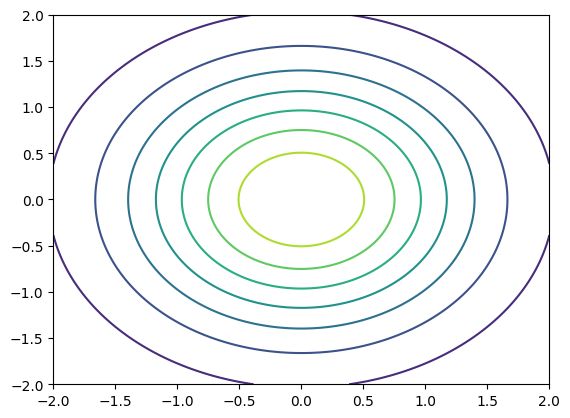

In [169]:

W0, W1 = np.meshgrid(w0_range, w1_range)

def likelihood(t, x, W0, W1):
    return np.exp(-0.5 *((t - W0*x - W1)/0.2)**2)/(math.sqrt(2*pi)*0.2)
    
    

prior = normal.pdf(W0) * normal.pdf(W1)
plt.figure()
plt.contour(W0, W1, prior)
##plt.scatter(normal.pdf(W0), normal.pdf(W1))

plt.show()



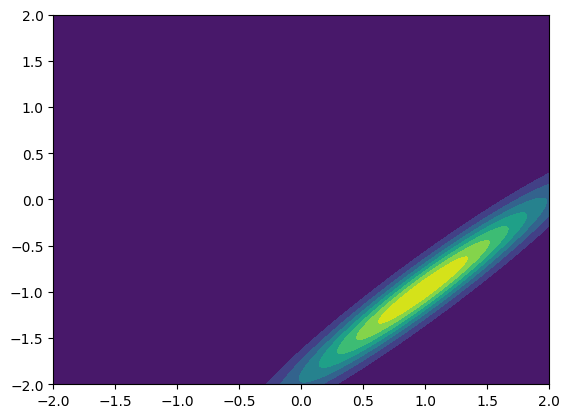

In [171]:
### task 1.2 ####
posterior = likelihood(t, x, W0, W1) * prior

plt.figure()
plt.contourf(W0, W1, posterior)

plt.show()

In [238]:
### task 1.3 ####
alpha = 1 / 0.2
beta = 0.2
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]

#print(np.transpose([1, -1])*[1, -1])

x_vec = data_x
ones = np.ones(len(x_vec))
np.transpose([ones, x_vec]), [ones, x_vec]
print(np.matmul([ones, x_vec],np.transpose([ones, x_vec])))

def create_samples(t_vec, x_vec, samples):
    ones = np.ones(len(x_vec))
    
    S = np.identity(2)*alpha + beta*np.matmul([ones, x_vec], np.transpose([ones, x_vec]))
    M = beta*np.matmul(S, np.transpose([ones, x_vec]))*t_vec
    return np.random.multivariate_normal(M, S, samples)




samples = create_samples(data_t, data_x, 5)
##np.random.multivariate_normal(M_1D , S_1D, 5)
print(samples)

w0 = []
w1 = []
for i in samples:
    w0.append(i[0])
    w1.append(i[1])


x_axis = np.linspace(-1,1, 200)

y = []
plt.figure()
for i in range(5): 
    y = w0[i]*x_axis + w1[i]
    plt.plot(x_axis, y, label= f"w0 = {w0[i]}, w1 = {w1[i]}")


plt.legend(loc='upper center')
plt.show()



[[ 7.     -0.23  ]
 [-0.23    5.4831]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 2)

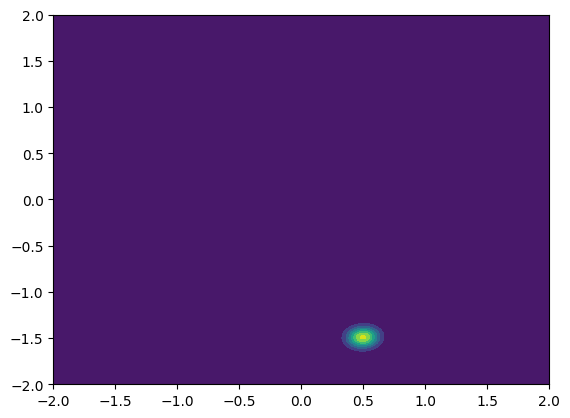

In [173]:
## task 1.4 ###
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]


def calc_posterior(data_t, data_x, w0, w1, prior, length):
    posterior = likelihood(data_t[0], data_x[0], w0, w1) * prior
    for i in range(length):
        if i > 0:
            posterior *= likelihood(data_t[i], data_x[i], w0, w1)
    return posterior


new_posterior = calc_posterior(data_t, data_x, W0, W1, prior, 7)

plt.contourf(W0, W1, new_posterior)
plt.show()